### 머신러닝 ,데이터 규칙을 찾고 학습하고 결과를 예측하는 분석방법
#### 인공지능의 한 분야
#### 2가지 학습 방법
#### 1) 지도학습 (답지있음) 통계자료가 있다. 집가, 의료기관수, 암진단 등  결과에 대한 답이 있다. -> 타겟, 라벨이 있음 -> 정확도 높음
#### 2) 비지도 학습 (답지 없음) -> 데이터 수집 -> 정확도 낮다

#### 해결하는 주요문제 1)회귀, 2)분류, 3)군집
#### 사이킷런의 모듈을 이용해서, 위의 머신러닝 테스트를 진행할 예정
#### 논문, 트위터, 유튜브, 깃허브 등을 이용해서, 관련 자료를 많이 수집함. GPT도 많이 사용함 

#### REST 서버 구축시, 파이썬에 과학 관련된 라이브러리가 많다보니
#### 파이썬 관련 서비스 제공하는 REST API 따로 만들기도 함 
#### Django 장고(잰고) : 파이썬 기반의 웹 프레임 워크, flask, FAST API, 전부다 파이썬 기반

#### 압단 ( 기본적인 웹, 리액트, 안드로이드 앱 )
#### 뒷단 (스프링, 노드js, 장고, 플라스크, fast API, 파이어베이스, 네이버 카카오 구글 등 각종 API)

#### 답이 있는 데이터, 지도학습

#### 주택가격 예측
#### 자동차 연비 예측

## 샘플 데이터, 사이킷 런에 내장된 데이터, 보스턴 집값을 사용하면 됩니다.
### 버전이 변경되어 데이터 받으려면, 버전 맞춰주는 작업이 필요

#### 일반 프로그램 진행방식, 머신러닝 진행 방식
#### 일반 프로그램 진행방식
#### 입력(x) --> 일반프로그램 (예) 함수 -> 결괏값(Y)

#### 머신러닝 진행 방식
#### 입력값(x) --> ML 프로그램 (예) 함수 --> 학습모델 --> 결괏값(y)
#### 새로운 입력값(x) --> 학습모델 -> 새로운 출력값 (y) = 예측값,

#### 머신러닝 프로세스
#### 1)데이터 수집 2) 데이터 전처리 및 학습/ 테스트 분할 3) 모델 구축 및 학습 4) 모델 평가 5) 예측

#### 분석평가 지표
#### 오류 부분의 지표가 낮을수록 좋다.
#### MAE : Mean Absolute Error : 오류의 절댓값 평균
#### MSE : Mean Squared Error : 오류 제곱의 평균
#### RMSE : Root Mean Squared Error : 오류 제곱 평균의 제곱근 
#### R^2 : Variance Score: 결정계수 , 예측값의 분산 / 실제값의 분산으로 나눈 비율

In [23]:
# 기존 -> !pip3 install sklearn
!pip3 install scikit-learn==1.0.2

In [24]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inc

In [25]:
# 사이킷런 내부 데이터를 -> 메모리 -> 데이터 프레임 담기 -> 값이 있는지 확인 -> Head(), 상위 5개 확인 
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# 보스턴 집값 예측, 여기서 종속변수(타겟, 라벨) price 가격이 따로 속성이 있음 
# 현재 데이터 프레임에 새 컬럼으로 추가하기 price
boston_df["PRICE"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
# 보스턴 집값 관련 데이터 몇개 인지?
print(f"보스턴 집값의 행 열 : {boston_df.shape}")

보스턴 집값의 행 열 : (506, 14)


In [28]:
# 기본 정보 조회 : info()
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 각 컬럼의 정보
#### CRIM : 지역별 범죄 발생율
#### ZN : 25,000 평방피트를 초과하는 거주 비율
#### INDUS : 비상업 지역의 넓이 비율
#### CHAS : 찰스 강의 더미 변수 (1은 강변, 0은 아님)
#### NOX : 일산화 질수 농도
#### RM : 거주 가능 방 갯수
#### AGE : 1940년 이전에 건축된 주택 비율 
#### DIS : 5개 주요 고용센터까지 가중 거리
#### RAD : 고속도록 접근 용이도
#### TAX : 10,000 달러당 재산세 비율
#### PTRATIO : 지역의 교사와 학생 비율
#### B : 지역의 흑인 거주 비율
#### LSTAT : 하위 계층 비율
#### PRICE : 본인 소유 주택 가격의 중앙값

In [29]:
# 선형(직선) 회귀분석을 이용해서, 분석 모델 구축
from sklearn.linear_model import LinearRegression
# 학습용, 테스트용 데이터 분리해주기
from sklearn.model_selection import train_test_split
# 분석 평가지수, MSE(오류의 제곱 평균 : 낮을 수록 좋다. 모델의 예측값이, 실제값과 거의 비슷)
# R^2 : 예측값 / 실제값, 나눈 비율. 클수록 좋다. 모델의 예측값이 실제값과 거의 비슷
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# X , Y 분할 독립변수, 종속변수 나누는 작업 
Y = boston_df["PRICE"]
# PRICE를 제외한 나머지 변수를 가져오기
# axis = 1 : 열기준
# inplace = False : 원본에 영향을 안주겟다
X = boston_df.drop(["PRICE"], axis = 1, inplace = False)

In [31]:
# 훈련용, 테스트용으로 데이터를 분리하는 작업
# test_size=0.3 비율, 학습 데이터 : 70%, 평가 데이터 : 30%
# random_state = 156 -> 동일한 방식으로 데이터 분할 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 156 )

In [32]:
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, Y_train : {Y_train.shape}, Y_test : {Y_test.shape}")

X_train : (354, 13), X_test : (152, 13), Y_train : (354,), Y_test : (152,)


In [33]:
# 선형 회귀 분석 이용해서, 모델 생성
lr = LinearRegression()

In [34]:
# 모델 이용해서 ,훈련하기 -> 모델 학습시키기
lr.fit(X_train, Y_train)

LinearRegression()

In [35]:
# 학습된 모델 이용해서, 평가하기 예측값을 이용해서 실제값과 비교하기 
# 예) 상용이가 70문제로 학습한 모델을, 테스트 확인 하는 작업
# 예) 30문제로 평가하기. 예측값 구하기
y_predict = lr.predict(X_test)

In [36]:
# 평가 분석 지표
# MSE : 오류 제곱 평균
# R^2 Score : 예측값 / 실제값 나눈 비율
# Y_test : 답지, y_predict : 상용이가 학습해서, 시험친 결과
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트 4 -> 2 값을 통일 시켰다. 나중에 스케일링을 많이 함 , 정규화 등으로 고쳐야
# 통계시 , 효율적으로 작업이 진행되므로, 그래서 ,이런 작업을 많이 함 
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test,y_predict)

print(f"mse : {mse}, rmse : {rmse}, r2_value : {r2_value}")


mse : 17.296915907901987, rmse : 4.158956107955696, r2_value : 0.7572263323138945


In [37]:
# 선형 회귀 분석, 직선의 구성 요소
# x절편, y절편 계수 등에 대해서, 직선을 분석해보기 
print(f"Y 절편의 값 : {lr.intercept_}")
print(f"회귀 계수 값 : {np.round(lr.coef_,1)}")

Y 절편의 값 : 40.9955951721641
회귀 계수 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [38]:
# CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	PRICE
coef = pd.Series(data = np.round(lr.coef_,2), index = X.columns)
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [39]:
# 직선 -> y = ax + b
# Y (price) = -0.11 * X(CRIM) + 0.03 * X(INDUS) + ....
# 계수들은, 모델 성능을 최적화 할때, 사용 되는 하이퍼 매개변수, 웨이트 값(비중값)
# 비중값들의 여러 환경적인 요인에 의해서 조정이 됩니다 
# 예를 들어, 딥러닝 -> 다층 신경망 사이사이에, 손실함수, 활성화 함수, 정규화 등 이용해서 
# 최적의 비중값을 찾아가는 과정. -> 모델을 성능을 최적화하는 과정

In [41]:
!pip3 install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.5 MB/s eta 0:00:00a 0:00:01


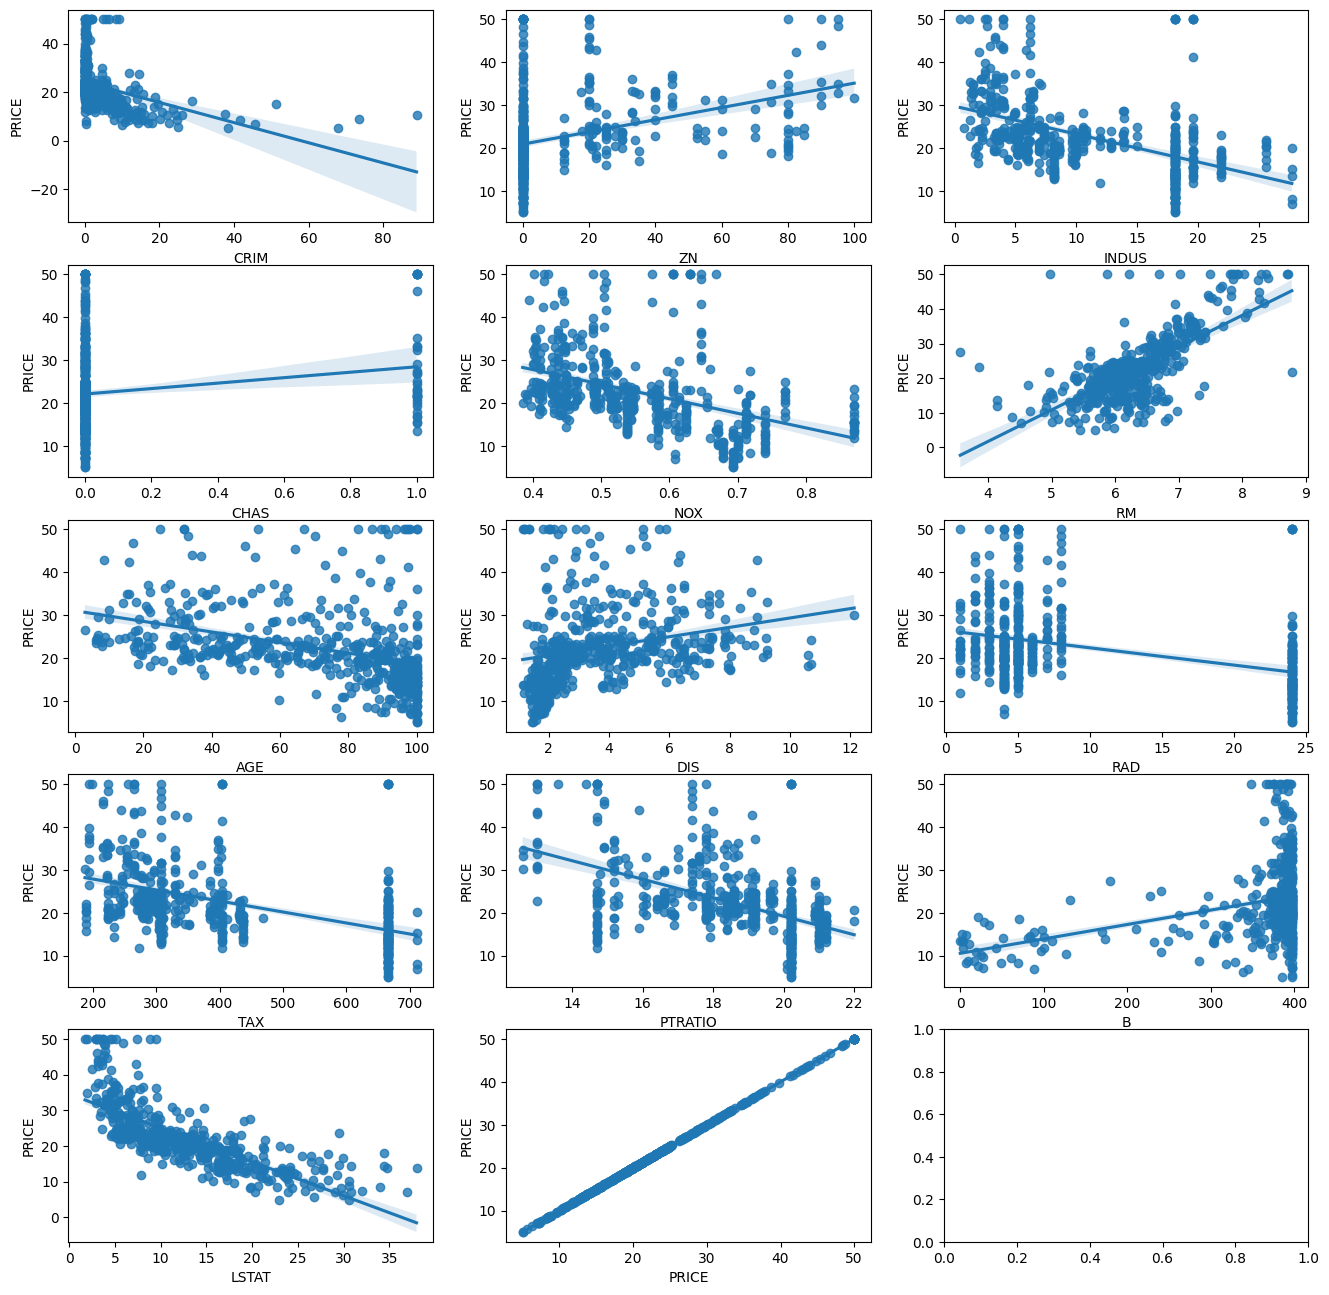

In [42]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도 하고, MSE R^2 , 평가지표
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사
# 시각화 
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지들을 , 5*3 , 표 형태로 나타내기
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 5)

x_features = ["CRIM",	"ZN",	"INDUS",	"CHAS",	"NOX",	"RM",	"AGE","DIS",	"RAD",	"TAX", "PTRATIO",	"B",	"LSTAT",	"PRICE"]

for i, feature in enumerate(x_features):
  # 몫 -> 5개 행으로
  row = int(i/3)
  # 나머지 -> 0,1,2 반복
  col = i % 3
  sns.regplot(x = feature, y = "PRICE", data = boston_df, ax = axs[row][col])